# Determining Language Differences Between Interest Groups
**Aditi Vinod & Luke Witten**

## Introduction: []

### Primary Questions
What terms are unique to internet sub-communities, like gamers? \
Based on social media content or messages sent, can an individual be associated with a specific internet sub-community?

### Background Information
Due to the ease of access to the internet, people have been able to find and interact with niche groups that share similar interests to themselves online. Similar to how dialects and accents have formed based on regions in the past, various new words and phrases, exclusive to individual communities, have popped up in sectors of the internet. 

One example of a popular community with a large online presence is gamers. Especially following the recent 2020 COVID-19 pandemic, there has been a significant increase in the past few years in the number of individuals who spend time playing games - both individually and in teams - online. Through content creators (on Twitch, YouTube, TikTok, etc.), online forums, and memes, the English-speaking gaming community likely has one of the most developed subsets of the language to exist; there are a significant number of terms, like "pog," "gg," and "smurf" that have either no significance or mean something different to non-gaming members of society. 

Being able to identify these differences in language helps [] 2-Why is this question or story important?

In order to create a list of "gamer words," or terms that are unique to gamers online, and determine whether an individual is a gamer, several steps must be taken: \
1-Collect data that reflects usage of language online in "gamer" communities and "normally" \
2-Compare the two data sets in order to create a list of "gamer words" that did not include unavoidable common words in the English language \
3-Collect data for individual users representing their usage of language \
4-Use the "gamer words" list and the individuals' usage of said gamer words to determine whether they are a gamer or not

### Prerequisite Code
The following cell ensures that the necessary functions are imported into the document and that the notebook uses the latest version of all code in the library:

In [132]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from wordcloud import WordCloud

from scrape_data import *
from gamer_words import *
from visualize_data import *

import csv
import gamer_words
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Methodology
 
### Data Collection
#### Reddit Data
The data that was collected in order to determine "gamer" and "normal" usage of language on the internet was pulled from Reddit. Reddit was chosen because it is a platform that is used by a significant number of people on the internet across hundreds of sub-communities, represented by subreddits. 
 
Data from Reddit was gathered via the ``PRAW`` API which was used to go through the text present on the top 10000 posts on various given subreddits. Via the ``scrape_subreddits`` function, the text from these submissions was stored in a dictionary where the keys represented each word and the values represented the number of times that said word appeared. Prior to being added into these dictionaries, the text from Reddit was made lowercase and punctuation was removed. The dictionary was then converted into a CSV file, using ``csv_to_dict`` for storage. 
 
Initially, the comments from each post were also being stored; however, ``PRAW`` has limitations regarding how many comments it is capable of parsing at a given time and was unable to handle the sheer amount of comment discourse present on the subreddits chosen for data analysis. As a result, the comment scraping was removed and the number of submissions parsed was increased from the original 2000 to 10000. The number of submissions parsed was determined by increasing it until there no longer significantly affected the program's resulting "gamer words". 
 
While the ``scrape_subreddits``can take in a list of any amount of subreddit names, it was determined that collecting data from five subreddits was ideal. To maintain a similar number of normal subreddits and gamer subreddits, the latter were used as the limiting factor; there is a large dropoff in activity and subscriber count in game specific subreddits after [/r/leagueoflegends](reddit.com/r/leagueoflegends), [/r/pokemon](reddit.com/r/pokemon), and [/r/minecraft](reddit.com/r/minecraft). The combination of these three major game subreddits and the two overall "gaming" subreddits - [/r/gaming](reddit.com/r/gaming) and [/r/games](reddit.com/r/games) - creates a total of five.
 
The subreddits that were chosen for "gaming" and "normal" subreddits were selected based on those with the greatest popularity; this was determined by a combination of number of subscribers and by ensuring that there was still frequent posting present on the subreddits in question. For example, initially, [/r/announcements](reddit.com/r/announcements) was one of the selected "normal" subreddits; however, despite it being the most subscribed to subreddit, there are almost no posts there, so it was replaced. Additionally, subreddits that were primarily centered around images and video, like [/r/aww](reddit.com/r/aww), were excluded. The final gaming subreddits chosen were [/r/gaming](reddit.com/r/gaming), [/r/games](reddit.com/r/games), [/r/leagueoflegends](reddit.com/r/leagueoflegends), [/r/minecraft](reddit.com/r/minecraft), and [/r/pokemon](reddit.com/r/pokemon); the final "normal" subreddits chosen were [/r/iama](reddit.com/r/iama), [/r/askreddit](reddit.com/r/askreddit), [/r/science](reddit.com/r/science), [/r/worldnews](reddit.com/r/worldnews), and [/r/todayilearned](reddit.com/r/todayilearned).
The frequency CSVs from the "gamer" and "normal" subreddits were used to determine a list of gamer-specific words.
 
#### Discord Data
The data that was collected from users was pulled from Discord. Discord is a messaging platform where individuals can join servers, or spaces on discord for individual communities and friend groups, and communicate through various channels, or messaging spaces that are typically split up by different topics or rules within a server. Discord was chosen as messaging is where the most natural usage of individual language occurs; furthermore, there was easy access with multiple servers containing between 150-14000 messages per individual. 
 
Data from eighteen users was collected from one server that had no primary purpose other than being a means of communication between friends. Data from six additional users was collected from a different server that was dedicated to gaming, specifically Minecraft. All users in question were briefed on what data would be collected and how it would be used prior to giving consent. 
 
The ``collect`` command takes in either a user, or assumes the user calling the command in the server if none is specified, and parses through all of their messages in every channel in order to create a frequency dictionary of the words that they have sent. Like the Reddit data collected, all of the words are made lowercase and most punctuation is removed. The frequency dictionary is then turned into a CSV and automatically saved with Discord username as the file name. For the sake of privacy, the generated names have been modified in this implementation.
The frequency CSVs from the users were used to determine which users would be considered "gamers" based on their gamer word versus normal word usage.

### Data Processing
Now that we have our data (conveniently stored as CSV's) we can actually start analyzing our data.

Storing our data in this form means that we do not need to re-scrape the data from Reddit every time we want to analyze it, but it also means that the data is not readily accessible by the computer.

Luckily reading data from a CSV is not difficult, using the function `csv_to_dict` we can easily convert from a CSV file to a dictionary in python.

In [133]:
gamer_dictionary = csv_to_dict("gaming.csv")
for word in gamer_dictionary:
    value = gamer_dictionary[word]
    gamer_dictionary[word] = int(value)

print(f"The length of the dictionary is {len(gamer_dictionary)}")

The length of the dictionary is 17741


We now have access to a dictionary that tells us how many times a word is used in the dataset we collected, but many of these words appear only once or are typos. These results are not particularly useful as we want words that are commonly used by gamers.

We can remove words from the dataset who do not show up enough times fairly simply using `remove_too_uncommon()`. 

In [134]:
# Create a new dictionary with only words that appear 3 or more times
gamer_dictionary_1 = remove_too_uncommon(gamer_dictionary,3)
print(f"The length of the dictionary is {len(gamer_dictionary_1)}.")

The length of the dictionary is 5056.


This dataset is much smaller than the original and likely more representative of words that gamers actually say. 

If we want to find out which words gamers use most, then all we need to do is find which words appear most frequently in the dataset. Once we have these "gamer words" we can compare them against a user's post history to find out if they are a gamer or not.

Let's run `find_most_frequent()` to find the 5 most frequently occuring "gamer words"

In [135]:
gamer_dictionary_2 = find_most_frequent(gamer_dictionary_1,5)
print(f"The five most frequent gamer words are {gamer_dictionary_2}.")

The five most frequent gamer words are {'the': 6782, 'to': 4346, 'and': 3521, 'a': 3467, 'of': 3003}.


Looking at the words that appeared we can see that something is obviously wrong. While there is no doubt that gamers use words like "a", "and", and "the" frequently, nobody would be fooled into believing that these words are unique to the gamer vocabulary. 

To fully determine what words are unique to the gamer vocabulary, we will need to somehow compare the language dataset from gamers to a language dataset for non-gamers.

For our convenience, this data has already been scraped and is stored in `normal.csv`

~ aditi put something here about our methodology from scraping normal subreddits and what normal subreddits we scraped from~

To filter out words from both dictionaries we can go through each word in the gamer dictionary and compare how frequently a word occurrs in both dictionaries. If a word is used too similarly in both language sets then we can remove the word from both. 

Unfortunately, our dictionary currently stores the number of times a word has been used in a language set and not the percentage of times that a word is used in the entire language set. This is a simple enough thing to code though, and now exists in the form of the `instances_to_decimal` function.

In [136]:
# Create and store the normal dictionary
normal_dictionary = csv_to_dict("normal.csv")
for word in normal_dictionary:
    value = normal_dictionary[word]
    normal_dictionary[word] = int(value)

# Remove infrequent words
normal_dictionary_1 = remove_too_uncommon(normal_dictionary,3)
#switch the normal and gamer dictionaries from tracking the number of times 
#a word has been used to the frequency that a user uses that words
#for later functions it is also desirable if this function outputs the total
#usages of words in the original dictionary
gamer_decimal_dictionary, gamer_dict_total_words = instances_to_decimal(gamer_dictionary_1)
normal_decimal_dictionary, normal_dict_total_words = instances_to_decimal(normal_dictionary_1)

the_usages = gamer_dictionary_1["the"]
the_decimal = gamer_decimal_dictionary["the"]
print(f"\"the\" is used {the_usages} times in the gamer dictionary.")
print(f"\"the\" is used {the_decimal} of the time in the gamer language set.")

"the" is used 6782 times in the gamer dictionary.
"the" is used 0.0482409343746888 of the time in the gamer language set.


Now that we have our data in a usable form, we can parse through our two language sets and remove words that appear a similar percentage of the time in both data sets. While the actual percentage value that is used for this process is arbitrary, we found that removing words with frequency values within +- 15% of each other worked well to find a good set of words.

We can use the function `remove_most_common()` to parse our two dictionaries with respect to each other and even output a list of words that were removed from both sets.

In [137]:
normal_decimal_dictionary_1, gamer_decimal_dictionary_1, ignore_list = remove_most_common(normal_decimal_dictionary,gamer_decimal_dictionary,normal_dict_total_words,gamer_dict_total_words)
print(f"The length of the dictionary is {len(gamer_decimal_dictionary_1)}.")

The length of the dictionary is 4325.


While we now have two curated language sets, one for the gamer language set and one for the normal language set, we still do not have a method for determining what words are extremely specific to the gamer lexicon. 

To do this, we can examine all words that appear in both the gamer and the normal dataset, if the word is used 5 times more frequently in the gamer language set than the normal language set, then we can determine it is a gamer word. While this 5x threshold is undoubtedly arbitrary, in testing we found that this value produced a good number of gamer words that were not too over specific, but also not too common as to not be considered gamer specific.

Sometimes possible gamer words do not appear at all in the normal language set, so there needs to be a method for these words to become gamer words as well. We foudn that in testing, if a word does not appear in both data sets and its frequency of occurrences values is over .00005 then it can be reasonably considered a gamer word. While this value of .00005 is also arbitrary, we found that using it produces a solid set of gamer words.

Using our curated data sets, we can find a number of gamer words using the `determine_gamer_words()` function.

In [138]:
gamer_words_1 = determine_gamer_words(normal_decimal_dictionary_1,gamer_decimal_dictionary)
print(f"There are {len(gamer_words_1)} gamer words.")

There are 614 gamer words.


In [139]:
folder_path = "suite_life_data"#"anonymous_data"
pars = parse_words(normal_dictionary_1, gamer_dictionary_1, 10)
dict_test = analyze_users_language(pars[0], pars[1], pars[2], pars[3], folder_path)


## Results

### Gamer Words
The list of gamer words can be represented as a word cloud based on how frequently they were used on the gaming subreddits that were parsed: 

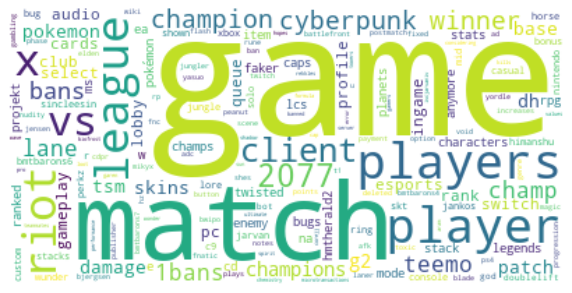

In [140]:
gamer_words_freq = Counter(determine_gamer_words_frequency(pars[0], pars[1]))
word_cloud(gamer_words_freq)

Game is the most prominent word present on gaming subreddits, as demonstrated by its size, which is heavily in line with the expectations for the determined "gamer words."

Most of the words that are present in the word cloud are also those that are associated with the game League of Legends, various esports teams, or other games in general, indicating that the "gamers" sub-community of the internet has developed its own language and it can be determined through parsing gaming subreddits.

### All User Data
***NEEDS AN X AXIS LABEL***

Stats were collected from the frequency dictionaries of the twenty five users that data was collected from. These stats include user words similarity to the "normal words," user similarity to the "gamer words," and the ratio of gamer words to all words in a users' messages. 

The following histogram displays the range of these stats over the twenty five users whose data was collected:

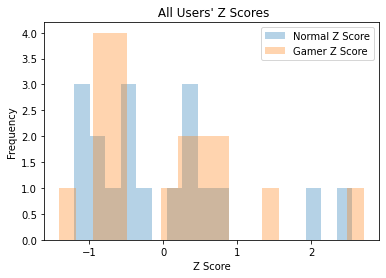

In [141]:
#stats = stats_lists(dict_test, folder_path)
#zs = stats_to_z_score(stats[0], stats[1], dict_test, folder_path)
#print(zs)

stats, z_dict, z_list = have_a_crisis(dict_test, folder_path)



bins = len(z_list[0])
stacked_histogram(z_list, bins, "Normal Z Score", "Gamer Z Score", "Z Score", " All Users' Z Scores")
#stacked_histogram(zs, bins, "Normal Z Score", "Gamer Z Score", "Z Score", " All Users' Z Scores")
#single_histogram(stats[2], bins, "Ratio", "Frequency v Gamer:All Words Ratio in Users")

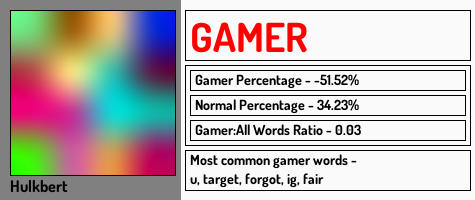

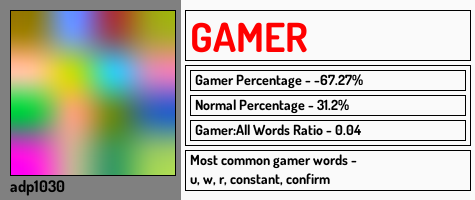

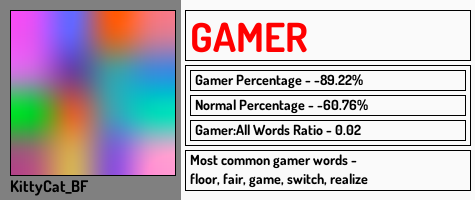

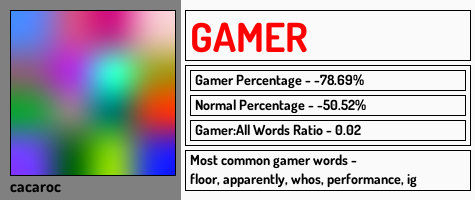

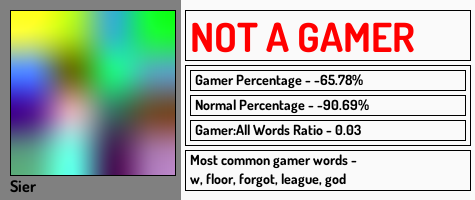

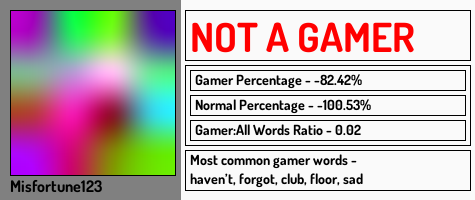

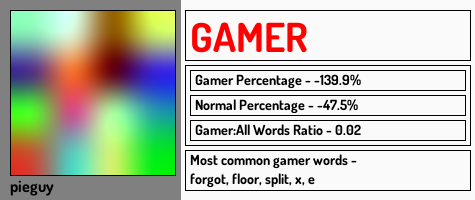

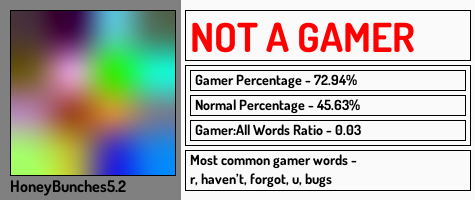

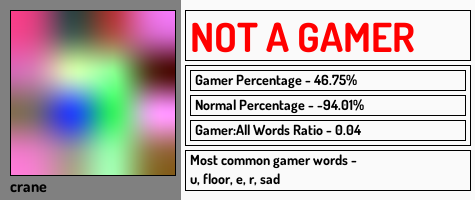

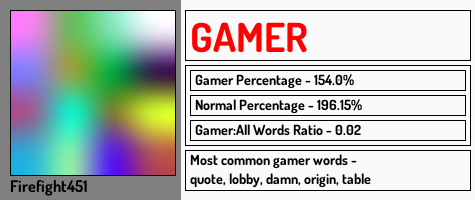

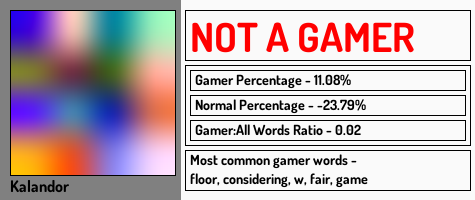

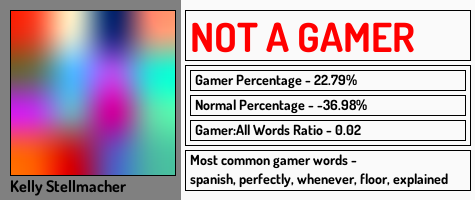

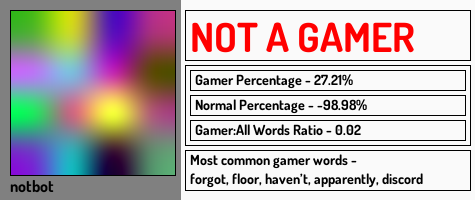

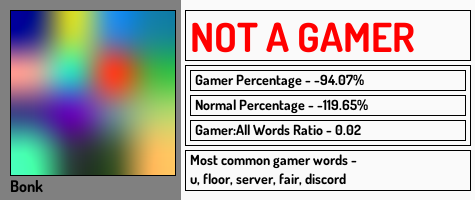

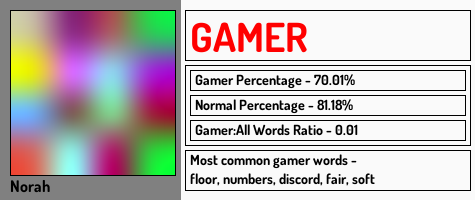

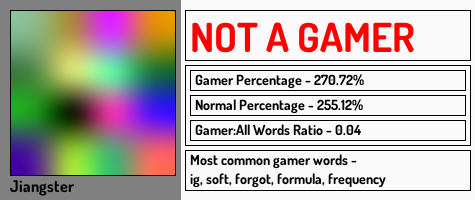

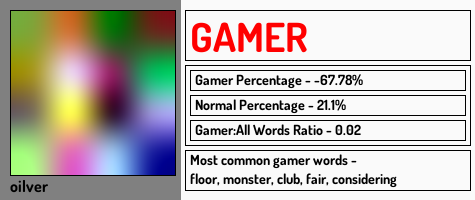

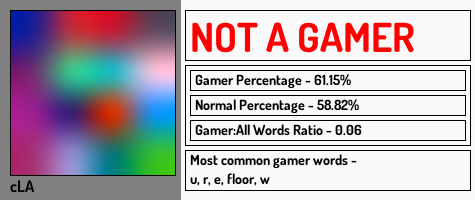

In [142]:
file_list = get_file_list(folder_path)
dict_test2 = analyze_users_language(pars[0], pars[1], pars[2], pars[3], folder_path)


user_id_dict = {}

for user in file_list:
    username = str(user)[len(str(folder_path))+1:-4]
    stats2, z_dict2, l_list = have_a_crisis(dict_test2, folder_path)
    gamer_z = z_dict2[user][1]
    normal_z = z_dict2[user][0]
    gamer_status = is_gamer(gamer_z, normal_z)
    gamer_all_freq = dict_test2[user][2]
    top = list(find_most_frequent_gamer_words(csv_to_dict(user), pars[2], 5).keys())

    id_info = [username, gamer_status, gamer_z, normal_z, gamer_all_freq, top]
    user_id_dict[user] = id_info

for user in file_list:
    create_profile_image(user_id_dict[user][0], user_id_dict[user][1], user_id_dict[user][2], user_id_dict[user][3], user_id_dict[user][4], user_id_dict[user][5])

### Analysis/Interpretation

The essay draws reasonably sound conclusions from the results.
The essay describes important insights and lessons from this project.
The essay addresses any contextual or ethical implications of the project.
The essay reflects on the project work, addressing difficulties and potential future work.

## Conclusion